## **Loading the Reuters dataset**

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels) , (test_data , test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 8s 4us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

# **Decoding newswires back to text**

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

557056/550378 [==============================] - 6s 10us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

## **Vectorizing the Data**
Encoding the data

In [9]:
import numpy as np

In [11]:
def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# **Building your network**
Model definition

In [14]:
from keras import models
from keras import layers

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape =(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# **There are two other things you should note about this architecture:**

 You end the network with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.

 The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the network to output something as close as possible to the true labels.

# **Compiling the model**

In [18]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## **Validating your approach**

Let’s set apart 1,000 samples in the training data to use as a validation set.

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]

**Training the model**

let's train the model with 20 epochs


In [20]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 24s 3ms/step - loss: 2.4979 - acc: 0.4906 - val_loss: 1.6782 - val_acc: 0.6510
Epoch 2/20
7982/7982 [==============================] - 7s 895us/step - loss: 1.3875 - acc: 0.7046 - val_loss: 1.2749 - val_acc: 0.7220
Epoch 3/20
7982/7982 [==============================] - 3s 362us/step - loss: 1.0450 - acc: 0.7707 - val_loss: 1.1149 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 2s 252us/step - loss: 0.8218 - acc: 0.8289 - val_loss: 1.0200 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 3s 318us/step - loss: 0.6576 - acc: 0.8638 - val_loss: 0.9706 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 2s 283us/step - loss: 0.5229 - acc: 0.8936 - val_loss: 0.9211 - val_acc: 0.8110
Epoch 7/20
7982/7982 [====================

In [21]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

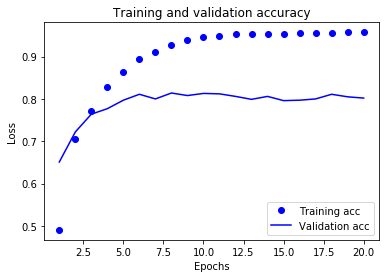

In [22]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 654us/step


In [24]:
results

[1.2318151005654068, 0.7858414959928762]

## **Retraining a model from scratch**

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#Compilation
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#training the model
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 6s 780us/step - loss: 2.5352 - acc: 0.5226 - val_loss: 1.6805 - val_acc: 0.6500
Epoch 2/9
7982/7982 [==============================] - 2s 264us/step - loss: 1.3761 - acc: 0.7120 - val_loss: 1.2809 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 2s 246us/step - loss: 1.0181 - acc: 0.7777 - val_loss: 1.1331 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 2s 253us/step - loss: 0.8017 - acc: 0.8236 - val_loss: 1.0519 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 2s 249us/step - loss: 0.6413 - acc: 0.8631 - val_loss: 0.9775 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 2s 248us/step - loss: 0.5116 - acc: 0.8928 - val_loss: 0.9089 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 2s 248us/step - loss: 0.4117 - acc: 0.9148 - val_loss: 0.8917 - val_acc: 0.8220
Epoch 8

In [26]:
results

[1.0203930758410866, 0.7778272484947504]